In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime # for exploring temporal features
import folium # for exploring trajectories on a map
from folium.plugins import PolyLineTextPath

In [3]:
birddata = pd.read_csv("/content/bird_tracking.csv")

In [4]:
# First, let's gather info on our dataset
birddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61920 entries, 0 to 61919
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          61920 non-null  int64  
 1   altitude            61920 non-null  int64  
 2   date_time           61920 non-null  object 
 3   device_info_serial  61920 non-null  int64  
 4   direction           61477 non-null  float64
 5   latitude            61920 non-null  float64
 6   longitude           61920 non-null  float64
 7   speed_2d            61477 non-null  float64
 8   bird_name           61920 non-null  object 
dtypes: float64(4), int64(3), object(2)
memory usage: 4.3+ MB


**Let's first explore the distribution of the dataset**

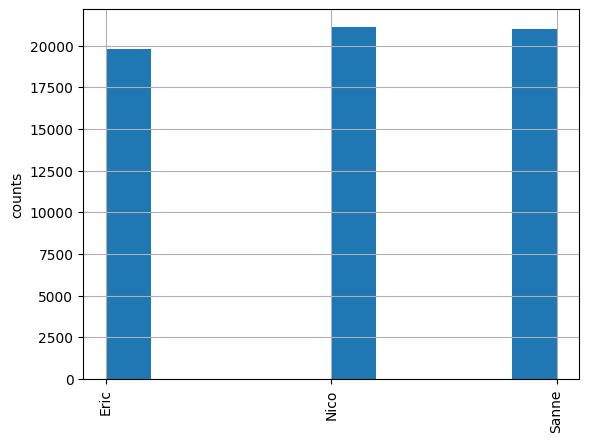

In [6]:
birddata["bird_name"].hist()
plt.ylabel("counts")
plt.xticks(rotation=90)

plt.show()

**Now, let's explore the temporal patterns**

In [7]:
# Convert to datetime
birddata["date_time"] = pd.to_datetime(birddata["date_time"])

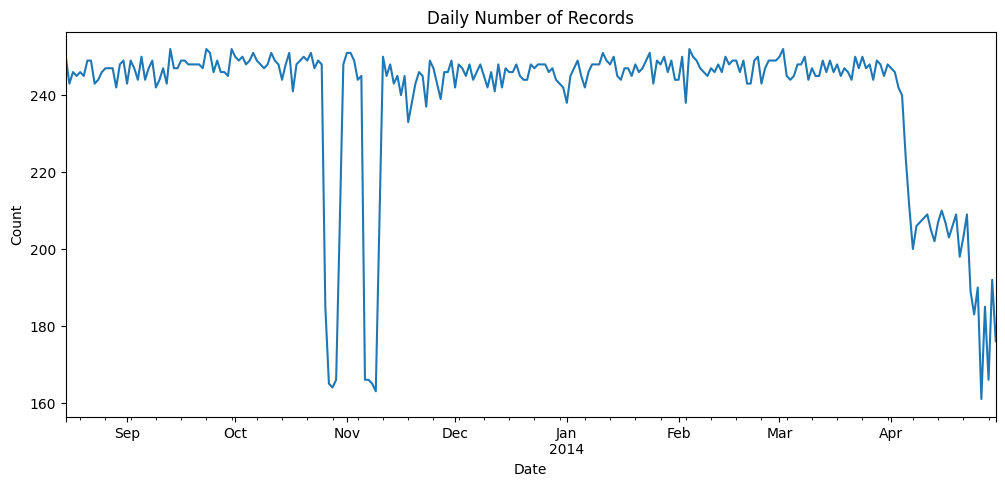

In [8]:
birddata.set_index('date_time').resample('D').size().plot(figsize=(12,5))
plt.title("Daily Number of Records")
plt.xlabel("Date")
plt.ylabel("Count")
plt.show()

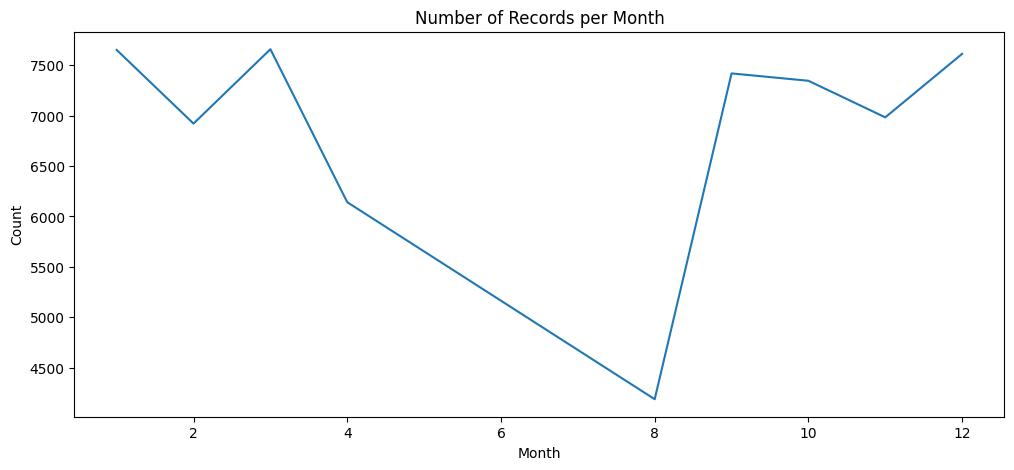

In [9]:
birddata["month"] = birddata["date_time"].dt.month
yearly_counts = birddata.groupby("month").size()

yearly_counts.plot(figsize=(12,5))
plt.title("Number of Records per Month")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()

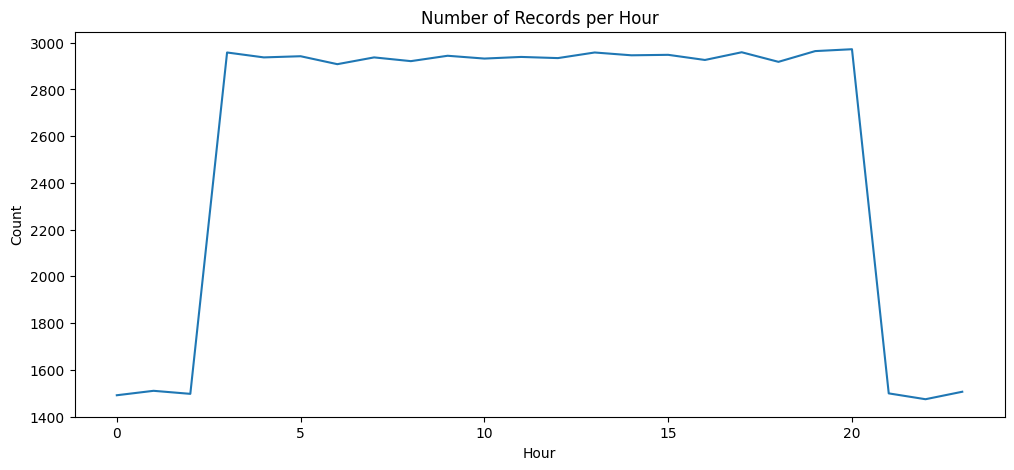

In [10]:
birddata["hour"] = birddata["date_time"].dt.hour
hourly_counts = birddata.groupby("hour").size()

hourly_counts.plot(figsize=(12,5))
plt.title("Number of Records per Hour")
plt.xlabel("Hour")
plt.ylabel("Count")
plt.show()

In [11]:
birddata["year"] = birddata["date_time"].dt.year

**Now, let's explore the spatial patterns, first let's look at the general heatmap of bird's trajectories**

In [12]:
from folium.plugins import HeatMap

m = folium.Map(location=[birddata['latitude'].mean(), birddata['longitude'].mean()], zoom_start=3)

heat_data = birddata[['latitude', 'longitude']].values.tolist()

HeatMap(heat_data, radius=8, blur=5).add_to(m)

m

In [112]:
# Add speed information of the bird onto the trajectory maps:

# let's first normalize the speed feature
#birddata["speed_2d"] = (birddata["speed_2d"] - birddata["speed_2d"].min())/(birddata["speed_2d"].max() - birddata["speed_2d"].min())

# Trajectory for all birds with speed information:
import numpy as np
m = folium.Map(location=[birddata['latitude'].mean(), birddata['longitude'].mean()], zoom_start=4)

unique_birds = birddata["bird_name"].unique()

for bird, color in zip(unique_birds, colors):
  rgb = f"rgb({int(r*255)}, {int(g*255)}, {int(b*255)})"
  trajectory_bird = birddata.loc[birddata["bird_name"]==bird, ["latitude", "longitude"]].values.tolist()
  trajectory = folium.ColorLine(trajectory_bird, colors = np.log1p(birddata["speed_2d"]), colormap=["green", "yellow", "red"], weight=2).add_to(m)
m


Output hidden; open in https://colab.research.google.com to view.